In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


# Exercise 1: Import raw California arrest data

In [2]:
# load in data
df = pd.read_csv(
    "https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/OnlineArrestData1980-2021.csv"
) 
df.head(10)

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Male,Black,Under 18,Alameda County,505,1351,188,26,79,2149,2286,295
1,1980,Male,Black,18 to 19,Alameda County,205,465,183,8,48,909,1333,0
2,1980,Male,Black,20 to 29,Alameda County,949,1593,606,27,178,3353,7974,0
3,1980,Male,Black,30 to 39,Alameda County,450,755,241,18,110,1574,4876,0
4,1980,Male,Black,40 to 69,Alameda County,172,218,117,11,66,584,3836,0
5,1980,Male,Black,70 and over,Alameda County,4,2,2,0,0,8,79,0
6,1980,Male,Hispanic,Under 18,Alameda County,151,365,40,9,77,642,1303,187
7,1980,Male,Hispanic,18 to 19,Alameda County,83,89,48,0,58,278,963,0
8,1980,Male,Hispanic,20 to 29,Alameda County,226,243,158,13,86,726,3748,0
9,1980,Male,Hispanic,30 to 39,Alameda County,59,80,41,8,33,221,1669,0


# Exercise 2: Unit of Observation

From the table, each row represent how many people have the relavant data values, for example, under F_drugoff (felony drug arrests), 188 black males under age 18 in Alameda County were arrested with this charge in 1980. 

# Exercise 3: Check for unique rows

In [3]:
#check for unique rows
df1 = df.duplicated(["YEAR", "GENDER", "RACE", "AGE_GROUP", "COUNTY"]).sum()
assert not df1.any()

# Exercise 4: Collapse data 

In [4]:
county_year_race = df.groupby(["YEAR", "RACE", "COUNTY"], as_index=False).sum()
county_year_race

/var/folders/n2/5x35hhp53jg1kc9jxswsqhww0000gn/T/ipykernel_96027/3573147655.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_year_race = df.groupby(["YEAR", "RACE", "COUNTY"], as_index=False).sum()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555
1,1980,Black,Butte County,32,33,5,0,7,77,139,0
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40
...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0


In [5]:
ex4_num_rows = county_year_race.shape[0]
print(f"There are {ex4_num_rows} rows.")

There are 9702 rows.


# Exercise 5: Identify collapsed variables

In [6]:
ex5_collapsed_vars = ["AGE_GROUP", "GENDER"]
ex5_collapsed_vars

['AGE_GROUP', 'GENDER']

# Exercise 6: Total drug and violent arrests

In [7]:
violent_year = county_year_race.groupby(["COUNTY", "YEAR"])["VIOLENT"].transform("sum")
drug_year = county_year_race.groupby(["COUNTY", "YEAR"])["F_DRUGOFF"].transform("sum")
county_year_race["total_violent_by_race"] = violent_year
county_year_race["total_drug_by_race"] = drug_year
county_year_race

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555,4504,3569
1,1980,Black,Butte County,32,33,5,0,7,77,139,0,306,149
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0,52,83
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0,28,9
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40,1596,1089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31,2360,635
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2,229,44
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18,1845,752
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0,480,92


# Exercise 7: Share of violent and drug arrestees for each racial group

In [8]:
# added columns for share of violent and drug-related arrests by race
county_year_race["share_violent_by_race"] = (
    county_year_race["VIOLENT"] / county_year_race["total_violent_by_race"]
)
county_year_race["share_drug_by_race"] = (
    county_year_race["F_DRUGOFF"] / county_year_race["total_drug_by_race"]
)
county_year_race.head()

,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555,4504,3569,0.575933,0.417204
1,1980,Black,Butte County,32,33,5,0,7,77,139,0,306,149,0.104575,0.033557
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0,52,83,0.000000,0.000000
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0,28,9,0.000000,0.000000
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40,1596,1089,0.451128,0.337925


In [9]:
# value between 0-1
ex7_alameda_1980_share_violent_arrestees_black = county_year_race[
    (county_year_race["YEAR"] == 1980)
    & (county_year_race["RACE"] == "Black")
    & (county_year_race["COUNTY"] == "Alameda County")
]["share_violent_by_race"][0]
print(f"Share of violent arrestees in Alameda county in 1980 that were black: {ex7_alameda_1980_share_violent_arrestees_black:.2f}")

Share of violent arrestees in Alameda county in 1980 that were black: 0.58


# Exercise 8: Double-check features after data manipulation

In [10]:
# check share of violent arrests fall between 0 and 1
assert county_year_race["share_violent_by_race"].all() >= 0
assert county_year_race["share_violent_by_race"].all() < 1

In [11]:
# Q2-1: check unique counties with data for black arrestees
county_year_black = county_year_race[county_year_race["RACE"] == "Black"]
county_year_black = county_year_black[county_year_black["F_TOTAL"] > 0]
assert county_year_black.nunique().loc["COUNTY"] == 58


In [12]:
# Q2-2: check unique counties with data for white arrestees
county_year_white = county_year_race[county_year_race["RACE"] == "White"]
county_year_white = county_year_white[county_year_white["F_TOTAL"] > 0]
assert county_year_white.nunique().loc["COUNTY"] == 58


# Exercise 9: Check counties per year and racial group

There is data from 1980 to 2021 which is a total of 42 years. We will seperate by race and group by county to see if each county has 42 rows, one for each year. 

In [13]:
black2 = (
    county_year_race[(county_year_race["RACE"] == "Black")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
black2.value_counts()

42    51
41     3
38     2
30     1
31     1
Name: YEAR, dtype: int64

In [14]:
white2 = (
    county_year_race[(county_year_race["RACE"] == "White")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
white2.value_counts()


42    58
Name: YEAR, dtype: int64

In [15]:
Other2 = (
    county_year_race[(county_year_race["RACE"] == "Other")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
Other2.value_counts()


42    57
40     1
Name: YEAR, dtype: int64

In [16]:
Hispanic2 = (
    county_year_race[(county_year_race["RACE"] == "Hispanic")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
Hispanic2.value_counts()


42    57
36     1
Name: YEAR, dtype: int64

There is data missing pertaining to Black arrestees from the following counties: Alpine County, Sierra County, Modoc County, Trinity County, Amador County, Mono County and Mariposa County. Upon further inspection, African Americans make up less than 2% of each of these counties (according to Census population data); with such a small sample there probably aren't any Black arrestees from those counties on those years. The same goes for Hispanic and Other races, they are underrepresented in the counties therefore there is limited data regardign them. However, there is data present across all counties and years for White arrestees since they make up the majority of each county in terms of population. 

In total there are 42 missing rows, that we need to fill in for. 

# Exercise 10: Fix the case of missing counties

In [17]:
all_years = list(county_year_race['YEAR'].unique())
all_races = list(county_year_race['RACE'].unique())
all_counties = list(county_year_race['COUNTY'].unique())

In [18]:
print(county_year_race.shape)
for race in all_races:
    for county in all_counties:
        for year in all_years:
            if county_year_race[(county_year_race['RACE'] == race) & (county_year_race['COUNTY'] == county) & (county_year_race['YEAR'] == year)].empty:
                to_add = pd.DataFrame({'YEAR':year, 'RACE':race, 'COUNTY':county, 'VIOLENT':0, 'PROPERTY':0, 'F_DRUGOFF':0,
       'F_SEXOFF':0, 'F_ALLOTHER':0, 'F_TOTAL':0, 'M_TOTAL':0, 'S_TOTAL':0,
       'total_violent_by_race':0, 'total_drug_by_race':0, 'share_violent_by_race':0,
       'share_drug_by_race':0}, index=[0])
                county_year_race = pd.concat([county_year_race, to_add], ignore_index=True)

print(county_year_race.shape)

(9702, 15)
(9744, 15)


In [19]:
#48 years * 58 counties * 4 races = 9744
assert county_year_race.shape[0] == 9744

# Exercise 11: Calculate average share of Black and White drug arrestees

In [20]:
ex11_white_drug_share = county_year_race[(county_year_race["RACE"] == "White")]['share_drug_by_race'].mean()
print(f"Average share of Black drug arrestees: {ex11_white_drug_share:.2f}")

Average share of Black drug arrestees: 0.62


In [21]:
ex11_black_drug_share = county_year_race[(county_year_race["RACE"] == "Black")]['share_drug_by_race'].mean()
print(f"Average share of White drug arrestees: {ex11_black_drug_share:.2f}")

Average share of White drug arrestees: 0.09


# Exercise 12: Plot violent arrests vs drug arrests

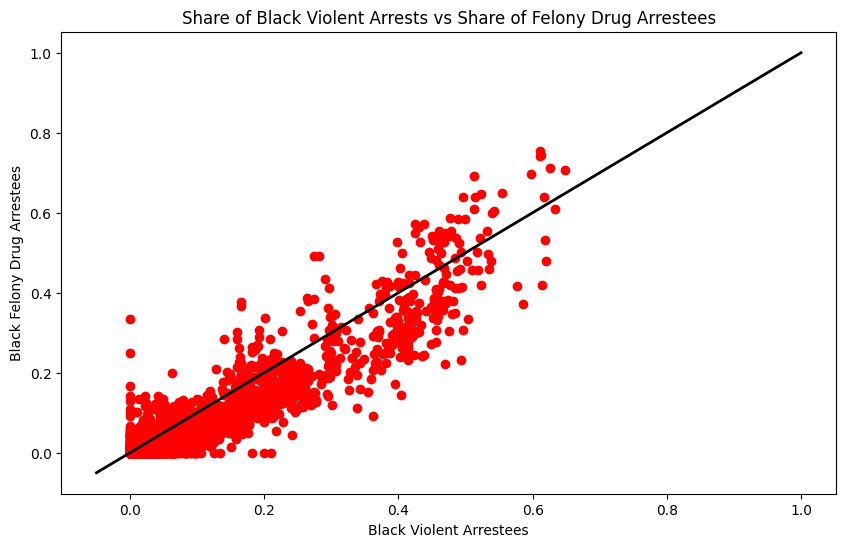

In [22]:
Black_drug = county_year_race[county_year_race['RACE'] == 'Black']
plt.figure(figsize=(10, 6))
plt.scatter(
    Black_drug["share_violent_by_race"], Black_drug["share_drug_by_race"], color="red"
)
plt.plot([-0.05, 1], [-0.05, 1], color="black", linewidth=2)
plt.title("Share of Black Violent Arrests vs Share of Felony Drug Arrestees")
plt.xlabel("Black Violent Arrestees")
plt.ylabel("Black Felony Drug Arrestees")
plt.show()


From the graph above, it shows that the felony drug arrestees and violent arrestees have positive relationship and look proportionate mostly. 

In [23]:
ratio = (Black_drug["share_violent_by_race"] / Black_drug["share_drug_by_race"]).fillna(0)
ex12_proportionate = "greater violent"

From the results, I think the black arrestees make up a greater share of violent arrestees. 

In [24]:
results = {
    "ex4_num_rows": ex4_num_rows,
    "ex5_collapsed_vars": ex5_collapsed_vars,
    "ex7_alameda_1980_share_violent_arrestees_black": ex7_alameda_1980_share_violent_arrestees_black,
    "ex11_white_drug_share": ex11_white_drug_share,
    "ex11_black_drug_share": ex11_black_drug_share,
    "ex12_proportionate": ex12_proportionate,
}

In [25]:
assert set(results.keys()) == {
    "ex4_num_rows",
    "ex5_collapsed_vars",
    "ex7_alameda_1980_share_violent_arrestees_black",
    "ex11_white_drug_share",
    "ex11_black_drug_share",
    "ex12_proportionate",
}
